## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [5]:
x_train.shape[1:]

(28, 28)

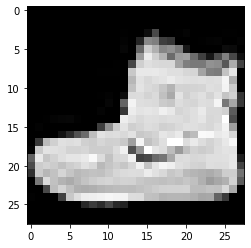

In [6]:
plt.imshow(x_train[0,:,:],cmap='gray')

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import to_categorical

In [0]:
y_train=to_categorical(y_train,10)

In [0]:
y_test=to_categorical(y_test,10)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')    # The digit 1 signifies the images are in grayscale
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train/=255

In [0]:
x_test/=255

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from sklearn import metrics

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [14]:
input_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape)) 
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 3,222,250
Trainable params: 3,222,250
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('accuracy'))

In [0]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

In [19]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=callback_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 24s 393us/step - loss: 0.3521 - acc: 0.8742 - val_loss: 0.2769 - val_acc: 0.9022
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2131 - acc: 0.9210 - val_loss: 0.2343 - val_acc: 0.9145
Epoch 3/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1488 - acc: 0.9454 - val_loss: 0.2403 - val_acc: 0.9176
Epoch 4/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0956 - acc: 0.9646 - val_loss: 0.2748 - val_acc: 0.9170
Epoch 5/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0605 - acc: 0.9781 - val_loss: 0.3035 - val_acc: 0.9146
Epoch 6/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0359 - acc: 0.9871 - val_loss: 0.3520 - val_acc: 0.9170
Epoch 7/10
600

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model_pooled = Sequential()
model_pooled.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape)) 
model_pooled.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_pooled.add(MaxPooling2D(pool_size=2))
model_pooled.add(Dropout(0.25))
model_pooled.add(Flatten())
model_pooled.add(Dense(256, activation='relu'))
model_pooled.add(Dense(10, activation='softmax'))

In [25]:
model_pooled.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [0]:
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

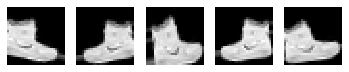

In [54]:
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
model_pooled.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
# datagen.fit(x_train)
model_pooled.fit_generator(datagen.flow(x_train, y_train), validation_data=(datagen.flow(x_test, y_test)), epochs=10, callbacks=callback_list)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6616 - acc: 0.7500 - val_loss: 0.5428 - val_acc: 0.7956
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4919 - acc: 0.8133 - val_loss: 0.4775 - val_acc: 0.8228
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4395 - acc: 0.8339 - val_loss: 0.4348 - val_acc: 0.8396
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4095 - acc: 0.8448 - val_loss: 0.3753 - val_acc: 0.8623
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3829 - acc: 0.8565 - val_loss: 0.3976 - val_acc: 0.8513
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3685 - acc: 0.8622 - val_loss: 0.3649 - val_acc: 0.8602
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3525 - acc: 0.8678 - val_loss: 0.3443 - val_acc: 0.8710
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [58]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9118


In [59]:
score = model_pooled.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.906


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [0]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [77]:
X_train.shape

(50000, 32, 32, 3)

In [78]:
X_test.shape

(10000, 32, 32, 3)

In [79]:
X_train.shape[1:]

(32, 32, 3)

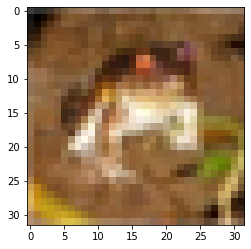

In [80]:
plt.imshow(X_train[0,:,:])

In [0]:
X_train=X_train.reshape(X_train.shape[0],32,32,3).astype('float32')
X_test=X_test.reshape(X_test.shape[0],32,32,3).astype('float32')

In [0]:
X_train/=255
X_test/=255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

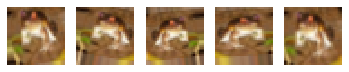

In [74]:
dg = data_gen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(dg.next().squeeze())
    plt.plot()
plt.show()